# Modelagem de Tópicos com a TF-IDF

A TD-IDF, como visto na aula anterior, representa os textos de forma matricial e leva em conta a importância de cada token em conta. A partir da TF-IDF, podemos realizar uma modelagem de tópicos, ou seja, podemos classicar nossos documentos os agrupando, no nosso caso, faremos isso para resumos de artigos. Vamos começar o procedimento obtendo nossa TD-IDF.

### Importar bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import spacy
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

### Lendo os abstracts

In [2]:
# Ler todos arquivos da Web of Science:
dados_total = pd.read_excel('dataframe_artigos.xlsx')

# Transformar os abstracts em uma lista.

#abstracts = list()
#for abst in dados_total['Abstract']:
#    abstracts.append(str(abst))

# Transformar os títulos em uma lista.

#titles = list()
#for tls in dados_total['Article Title']:
#    titles.append(str(tls))

In [3]:
abstracts = dados_total["Abstract"] #.iloc[:1000]

abstracts = abstracts.dropna()

index = abstracts.index

titles = list()

for id in index:
    a = dados_total['Article Title'][id]
    titles.append(a)

In [4]:
nlp = spacy.load('en_core_web_sm')

abs = list()

for texto in abstracts:

    #print(texto)

    # Eliminar letras maiusculas (Case Folding)
    #txt = texto.lower()

    # Tookenização
    texto = nlp(texto)

    # Remover stop_words
    w = [t for t in texto if not t.is_stop] 

    # Transforma os tokens em string
    string = [str(word) for word in w]

    # Junta as strings em uma sentença
    string_resultante = ' '.join(string)
    
    # Armazena a sentença em uma lista 
    abs.append(string_resultante)

### Obter a TF-IDF.

In [5]:
tfidf = TfidfVectorizer()

csr_mat = tfidf.fit_transform(abstracts)

words = tfidf.get_feature_names_out()
#print(csr_mat)

In [6]:
# Visualizar vocabulario

tfidf.vocabulary_

{'we': 36538,
 'investigated': 19721,
 'the': 34225,
 'associations': 6859,
 'between': 7708,
 'dietary': 12598,
 'intake': 19399,
 'of': 25113,
 'folate': 15705,
 'and': 6056,
 'vitamin': 36333,
 'b2': 7216,
 'mthfr': 23372,
 'c677t': 8569,
 'genotype': 16383,
 'colorectal': 10240,
 'adenomas': 5113,
 'in': 18887,
 'dutch': 13410,
 'case': 8934,
 'control': 10985,
 'study': 33138,
 'data': 11862,
 'cases': 8941,
 'with': 36763,
 'at': 6900,
 'least': 20757,
 'one': 25289,
 'histologically': 17725,
 'confirmed': 10713,
 'adenoma': 5111,
 '768': 4034,
 'controls': 10992,
 'no': 24334,
 'history': 17744,
 'any': 6365,
 'type': 35281,
 'polyp': 27309,
 '709': 3882,
 'were': 36619,
 'included': 18945,
 'was': 36490,
 'assessed': 6827,
 'using': 35918,
 'food': 15732,
 'frequency': 15935,
 'questionnaire': 28706,
 'multivariable': 23526,
 'models': 23027,
 'age': 5421,
 'if': 18510,
 'appropriate': 6484,
 'calcium': 8646,
 'adjusted': 5195,
 'odds': 25084,
 'ratio': 28951,
 'or': 25430,
 '9

In [7]:
# Cria uma matriz de zeros
df_tf_idf = pd.DataFrame(csr_mat.toarray(), columns = words)

# Transpoe matriz
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,9998,9999,10000,10001,10002,10003,10004,10005,10006,10007
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǎi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǐn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ǒng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Função para exibir os tokens mais importantes de um documento.

In [8]:
def TF_IDF_func_presrntation(Num):

    DF = df_tf_idf.T[Num].nlargest(10)

    print( 'Doc number ' , Num+1)
    print( 30*'-')
    
    return DF

In [9]:
TF_IDF_func_presrntation(1652)

Doc number  1653
------------------------------


religious        0.626331
denomination     0.351588
commitment       0.305312
korean           0.238409
christian        0.211827
american         0.201270
women            0.170184
denominations    0.117196
catholic         0.108661
polychotomous    0.108661
Name: 1652, dtype: float64

### Calculando a SVD

A SVD, do inglês Single Value Decomposition, é uma operação matricial semelhante a encontrar autovalores e autovetores, porém para matrizes não quadradas. O que faremos então, é calcular a SVD da TF-IDF. Abaixo temos uma imagem descrevendo o processo.

Notem que a TF-IDF é uma matriz com n linhas, sendo cada linha um documento, e m colunas, sendo cada coluna um token do vocabulário. Ao realizarmos a SVD, teremos três matrizes, uma com *n* linhas (documentos) e *r* colunas (tópicos), outra com *r* linhas e colunas e por fim uma com *r* linhas e *m* colunas (tokens do vocabulário).

<p align="center"><img src="SVD.png" width=500 />

Portanto, a matriz documentos X tópicos nos fornecerá o quanto cada documento se encaixa em cada tópico, já a matriz token X tópicos, nos informa o quanto cada token está relacionado a cada tópico. Esta análise não informa o que é cada tópico, isso deve ser classificado pelo usuário.

Outro detalhe, é que truncamos a SVD para o número de tópicos que desejamos, abaixo vamos relizar o processo para 10 tópicos. Ao final, a matriz documento-tópico é exibida.

In [10]:
# Reduzir a dimensicionalidade dos dados
svd = TruncatedSVD(n_components=10)
lsa = svd.fit_transform(csr_mat)

# Gerando matriz com as componestes 
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,"Dietary intake of folate and riboflavin, MTHFR...",0.263983,0.128321,-0.056940,0.062545,0.106350,-0.135611,0.132123,-0.158312,0.135367,-0.028998
1,Human plasma carotenoid response to the ingest...,0.234045,-0.029312,-0.016132,-0.045207,0.005493,-0.032650,0.009909,-0.133391,0.076260,-0.043339
2,Surveillance for Certain Health Behaviors and ...,0.255094,-0.047475,-0.010064,-0.129689,-0.077281,0.041515,0.016580,-0.029281,-0.030694,0.064650
3,Ethanol Consumption Does Not Promote Weight Ga...,0.195012,-0.043251,0.047705,-0.053179,0.055685,-0.053346,-0.028787,-0.127795,0.050183,-0.012826
4,Ghrelin regulates adipose tissue metabolism: R...,0.197334,-0.126944,0.016358,-0.041629,0.122643,0.014505,-0.027371,-0.041818,0.046287,-0.026165
...,...,...,...,...,...,...,...,...,...,...,...
10003,Increased risk of diseases of the basal gangli...,0.191929,-0.009233,-0.037332,-0.003919,-0.014325,0.025668,0.005500,-0.017321,-0.037872,-0.002405
10004,What is personalized medicine and what should ...,0.238844,-0.136859,0.030099,-0.053079,0.025914,-0.027291,0.002699,0.001051,-0.025289,0.033599
10005,Multiple health behaviours: overview and impli...,0.210656,-0.043159,0.027031,-0.111728,-0.070084,0.009024,0.037638,-0.042818,-0.084826,0.154712
10006,Risk factors for Epstein Barr virus-associated...,0.251845,-0.041319,-0.003997,0.008665,0.018246,-0.037473,0.042894,0.005226,-0.004892,0.069546


Vamos exibir a matriz token-tópico:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
00,0.009044,0.026798,-0.013853,0.002582,0.006724,-0.002938,-0.004422,0.002741,0.006317,0.003513
000,0.012822,-0.006393,0.003246,-0.024518,-0.009103,0.016520,-0.005564,0.061466,0.024782,-0.020693
0000,0.000080,-0.000125,-0.000271,0.000419,-0.000437,0.000293,0.000166,0.000269,-0.000317,-0.000479
000002,0.000020,-0.000049,-0.000057,0.000026,-0.000031,0.000043,0.000012,-0.000153,-0.000022,-0.000176
00001,0.000562,0.000862,0.000091,0.000932,0.001068,-0.000896,-0.000078,0.000547,-0.000469,0.000006
...,...,...,...,...,...,...,...,...,...,...
zz,0.000038,-0.000106,-0.000134,-0.000124,0.000381,0.000313,-0.000004,0.000116,0.000056,-0.000077
ǎi,0.000026,-0.000085,-0.000023,0.000032,-0.000157,0.000046,0.000053,0.000160,-0.000077,-0.000175
ǐn,0.000026,-0.000085,-0.000023,0.000032,-0.000157,0.000046,0.000053,0.000160,-0.000077,-0.000175
ǒng,0.000026,-0.000085,-0.000023,0.000032,-0.000157,0.000046,0.000053,0.000160,-0.000077,-0.000175


Vamos ordenar tópico a tópico agora.

In [12]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_4", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
hpv,0.027406,0.117241,0.121420,2.986920e-01,0.293150,0.075973,0.296090,0.039281,0.448853,0.432377
breast,0.087777,0.205829,0.661247,2.879600e-01,0.033309,0.261997,0.092578,0.092813,0.023269,0.028323
mortality,0.059613,0.052540,0.018909,2.618034e-01,0.075909,0.151743,0.052399,0.279548,0.304662,0.195533
patients,0.074739,0.125136,0.158601,2.071040e-01,0.134221,0.233377,0.089227,0.063615,0.156290,0.276453
health,0.054014,0.010291,0.027687,1.903722e-01,0.127883,0.040206,0.034141,0.055766,0.122657,0.158078
...,...,...,...,...,...,...,...,...,...,...
distributional,0.000045,0.000150,0.000111,1.284004e-08,0.000062,0.000121,0.000004,0.000059,0.000045,0.000009
artistic,0.000096,0.000175,0.000090,1.052707e-08,0.000067,0.000130,0.000051,0.000914,0.000002,0.000140
stance,0.000028,0.000035,0.000154,7.936781e-09,0.000006,0.000059,0.000073,0.000303,0.000034,0.000004
societyshows,0.000028,0.000035,0.000154,7.936781e-09,0.000006,0.000059,0.000073,0.000303,0.000034,0.000004


Podemos também graficar os tópicos como mostrado abaixo:

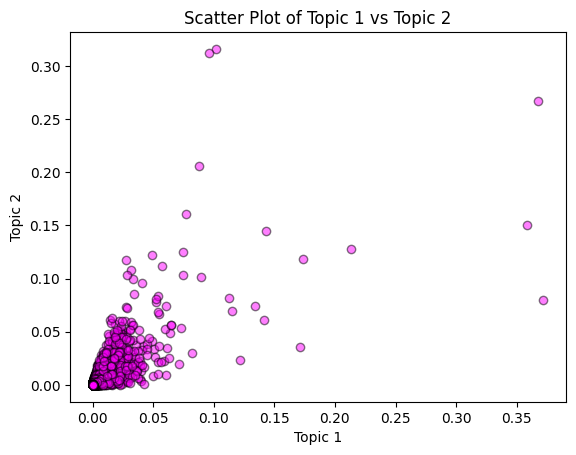

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_1"], encoding_matrix["topic_2"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

plt.show()

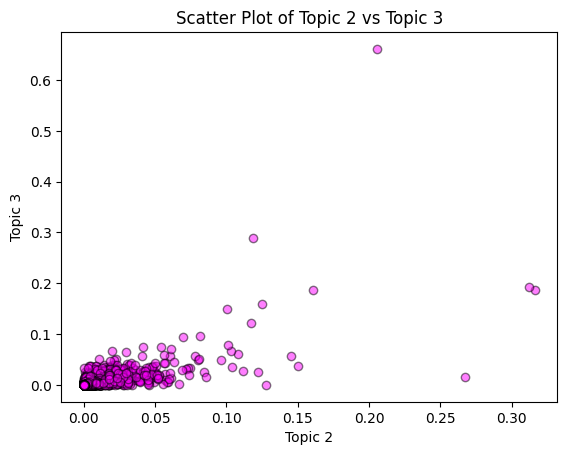

In [17]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_2"], encoding_matrix["topic_3"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 2')
ax.set_ylabel('Topic 3')
ax.set_title('Scatter Plot of Topic 2 vs Topic 3')

plt.show()

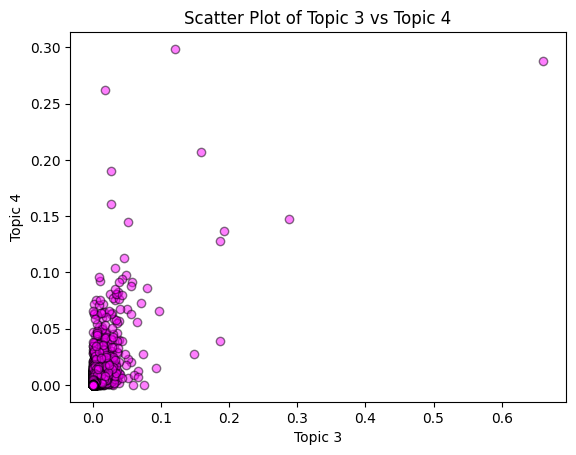

In [20]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_3"], encoding_matrix["topic_4"], alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4')

plt.show()

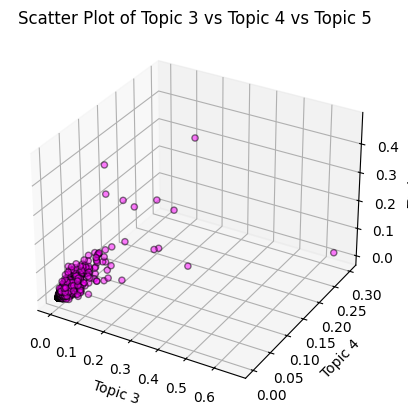

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_3"].values, encoding_matrix["topic_4"].values, encoding_matrix["topic_5"].values, alpha=0.5, linewidths=1, edgecolors="black", c="fuchsia")

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_zlabel('Topic 5')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4 vs Topic 5')

plt.show()

### Agrupamento com k-means

Inspirados pelos gráficos anteriores, podemos realizar um agrupamento dos dados, como já aprendemos na Disciplina de Aprendizado de máquina, podemos utilizar o k-means. Façamos isso então:

In [22]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)

c:\venv\ilumpy\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [26]:
df = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': abstracts})
print(df.sort_values('labels'))

      labels                                               docs  \
5583       0  Prevalence and spectrum of p53 mutations assoc...   
2913       0  Breast Cancer Research in the Nurses' Health S...   
964        0  Posttreatment Trajectories of Physical Activit...   
967        0  Alcohol metabolism, alcohol intake, and breast...   
968        0  MAPK Genes Interact with Diet and Lifestyle Fa...   
...      ...                                                ...   
3900       9  Alcohol consumption and decreased risk of non-...   
8217       9  Protective effects of Alda-1, an ALDH2 activat...   
3897       9  RISK-FACTORS FOR CHILDHOOD ACUTE NONLYMPHOCYTI...   
3882       9  DIESEL EXHAUST, DIESEL FUMES, AND LARYNGEAL-CA...   
3357       9  Modulation of expression of ribosomal protein ...   

                                               abstract  
5583  To explore the role of smoking in breast cance...  
2913  Objectives. To review the contribution of the ...  
964   BACKGROUND: Bre

Salvanto planilha com a classificação por tópicos.

In [27]:
#df.to_excel('topics.xlsx')

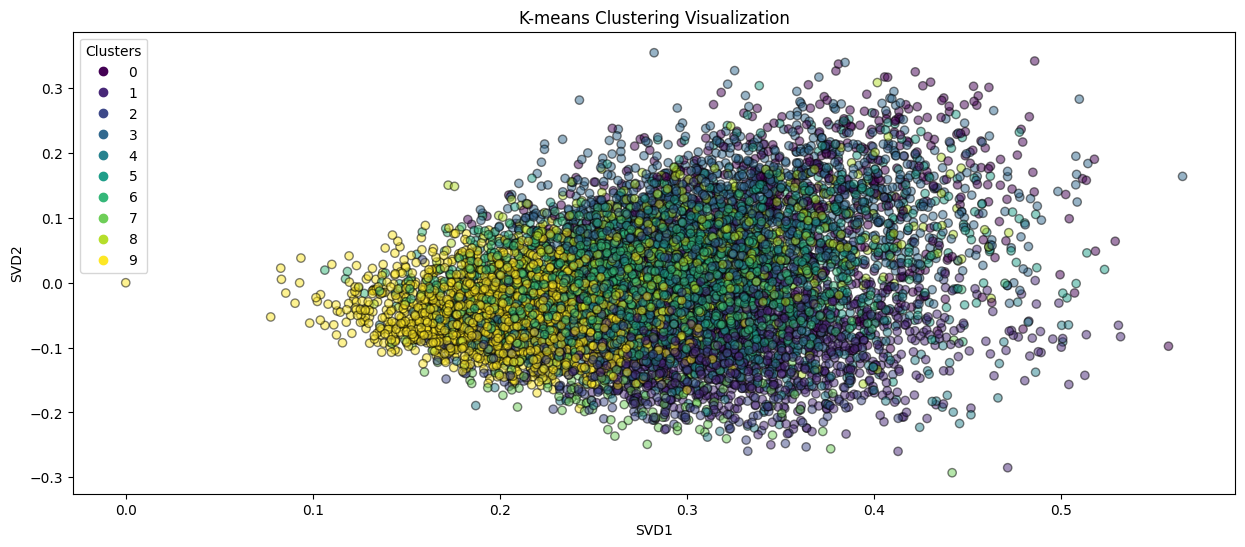

In [28]:
# Reduzir a dimensionalidade para visualização usando TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(csr_mat)

# Plotar os clusters
plt.figure(figsize=(15, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis', alpha=0.5, linewidths=1, edgecolors="black")
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title('K-means Clustering Visualization')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()